In [4]:
!pip install tensorflow-hub


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
pwd

'C:\\Users\\sreer\\Edure\\Data Science\\deep learning\\Deep learning capstone projects\\Sattelite image classification files'

In [7]:
cloudy = glob('data/cloudy/*.jpg')
desert = glob('data/desert/*.jpg')
green_area = glob('data/green_area/*.jpg')
water = glob('data/water/*.jpg')

In [8]:
len(cloudy)

1500

In [9]:
len(desert)

1131

In [10]:
len(green_area)

1500

In [11]:
len(water)

1500

In [12]:
classes = {0: 'cloudy', 1: 'desert' , 2: 'green_area' , 3: 'water'}                     #define class


## Load and Label Images

In [14]:
images =[]
labels =[]

for i in cloudy:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in desert:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in green_area:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in water:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

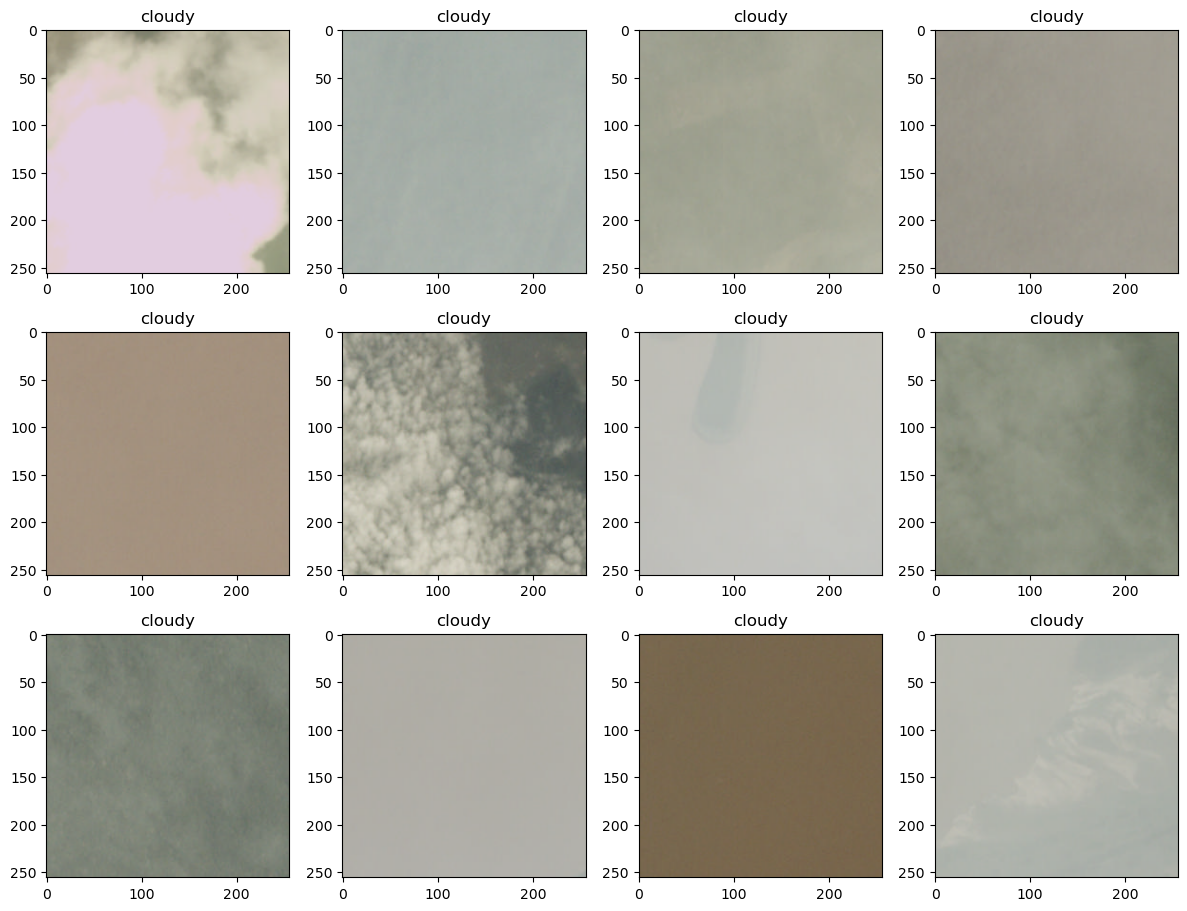

In [15]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i],cmap='gray')                                    #plot images
    plt.title(classes[labels[i]])
plt.tight_layout()

In [16]:
images,labels = shuffle(images,labels)             #Shuffle images

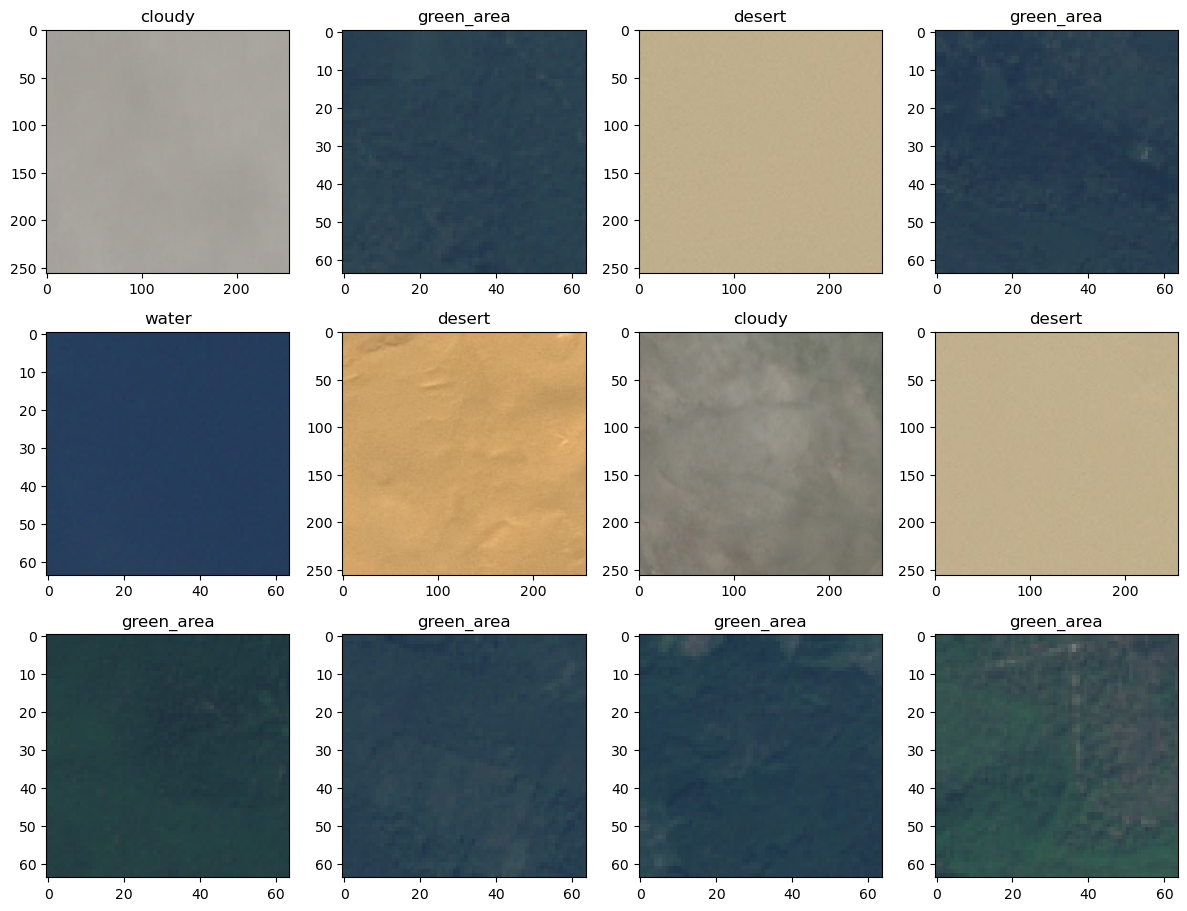

In [27]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [28]:
 X = []

for i in images:
    X.append(resize(i, (224,224,3)))                        #Resize Images

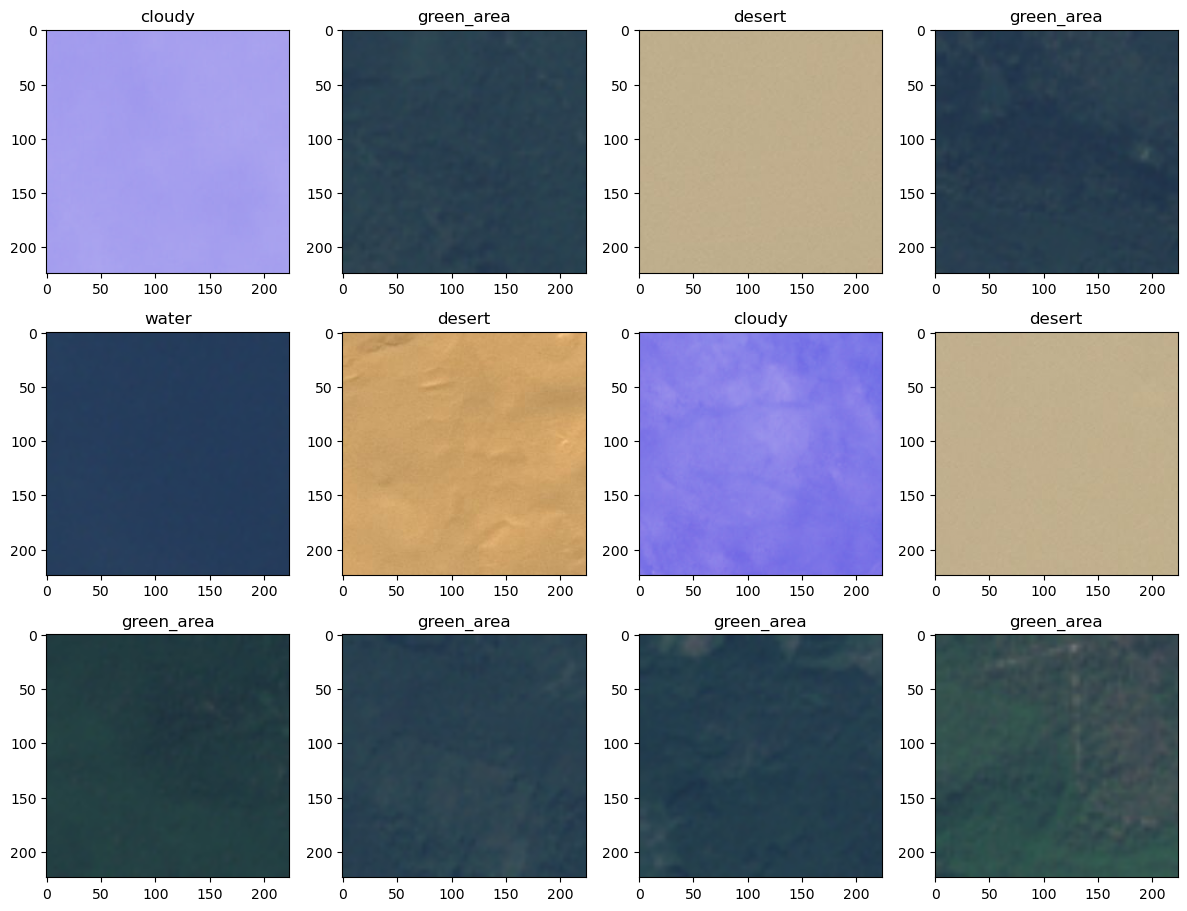

In [29]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i],cmap='gray')                          #Plotting after resizing
    plt.title(classes[labels[i]])
plt.tight_layout()

In [91]:
X = np.array(X)
y = np.array(labels)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [93]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [94]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1fa7582dd90>

In [95]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [96]:
y_test

array([3, 2, 2, ..., 3, 0, 0])

In [97]:
np.unique(y_test)

array([0, 1, 2, 3])

In [98]:
from tensorflow import keras
from tensorflow.keras import Sequential,layers

In [99]:
model = keras.models.Sequential([
        keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(32,(3,3),activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),                    
        keras.layers.Dense(6,activation= 'softmax')
])

C:\Users\sreer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [101]:
y_train

array([2, 1, 2, ..., 0, 0, 0])

In [102]:
X_train

array([[[[0.1912565 , 0.3162465 , 0.30734294],
         [0.19085634, 0.3162465 , 0.3032613 ],
         [0.19105642, 0.3162465 , 0.30530212],
         ...,
         [0.18347339, 0.29827931, 0.31342537],
         [0.18235294, 0.29643858, 0.31194478],
         [0.18459384, 0.30012005, 0.31490596]],

        [[0.19197679, 0.31736695, 0.30438175],
         [0.19189676, 0.31736695, 0.29997999],
         [0.19193677, 0.31736695, 0.30218087],
         ...,
         [0.18235294, 0.29763906, 0.31254502],
         [0.18123249, 0.29547819, 0.31090436],
         [0.18347339, 0.29979992, 0.31418567]],

        [[0.19161665, 0.31680672, 0.30586234],
         [0.19137655, 0.31680672, 0.30162065],
         [0.1914966 , 0.31680672, 0.3037415 ],
         ...,
         [0.18291317, 0.29795918, 0.31298519],
         [0.18179272, 0.29595838, 0.31142457],
         [0.18403361, 0.29995998, 0.31454582]],

        ...,

        [[0.18235294, 0.31256503, 0.31368547],
         [0.18011204, 0.31416567, 0.31192477]

In [103]:
model.fit(X_train,y_train, epochs = 10,validation_split=0.1,batch_size=16)

Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 107s 351ms/step - accuracy: 0.7610 - loss: 0.5809 - val_accuracy: 0.6829 - val_loss: 0.6904
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 89s 351ms/step - accuracy: 0.8281 - loss: 0.3629 - val_accuracy: 0.7251 - val_loss: 0.7269
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4057s 16s/step - accuracy: 0.8600 - loss: 0.3172 - val_accuracy: 0.8869 - val_loss: 0.2587
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 39s 152ms/step - accuracy: 0.9183 - loss: 0.1785 - val_accuracy: 0.8803 - val_loss: 0.2226
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 42s 167ms/step - accuracy: 0.9135 - loss: 0.2076 - val_accuracy: 0.8825 - val_loss: 0.2861
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 104s 254ms/step - accuracy: 0.9124 - loss: 0.1989 - val_accuracy: 0.8914 - val_loss: 0.3192
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 58s 228ms/step - accuracy: 0.9187 - loss: 0.1885 - val_accuracy: 0.9180 - val_loss: 0.1743
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 70s 275ms/step - accuracy: 0.9283 - loss:

In [117]:
y_pred = model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [119]:
y_pred =[np.argmax(i) for i in y_pred]

In [121]:
accuracy_score(y_test,y_pred)

0.8997338065661047